<a href="https://colab.research.google.com/github/ozmily/personal/blob/master/quiz4_ozmily1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
print("Sam Zmily, ozmily1@jhu.edu, ozmily")

Sam Zmily, ozmily1@jhu.edu, ozmily


#import stuff

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm
import torch

#Question One

In [210]:
## import data
df= pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")
df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'],\
             axis = 1)

# locate my specific data 
t1l1 = df.loc[(df.type == 1) & (df.level == 1)]
teleL=t1l1.loc[(t1l1.roi == 'Telencephalon_L')]
teleR=t1l1.loc[(t1l1.roi == 'Telencephalon_R')]
csf=t1l1.loc[(t1l1.roi == 'CSF')]

## Seperate the volumes from the data

teleLVol=teleL['volume'].values
teleRVol=teleR['volume'].values
csfVol=csf['volume'].values


##make new data file

data = pd.DataFrame({'CSF':csfVol, 'Telencephalon_L':teleLVol, 'Telencephalon_R':teleRVol})  



## fit the model

results = smf.ols('CSF ~ Telencephalon_L + Telencephalon_R', data = data).fit()
print(results.summary2())

                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.170     
Dependent Variable:     CSF                 AIC:                   453.0221  
Date:                   2019-09-28 00:10    BIC:                   456.0093  
No. Observations:       20                  Log-Likelihood:        -223.51   
Df Model:               2                   F-statistic:           2.941     
Df Residuals:           17                  Prob (F-statistic):    0.0800    
R-squared:              0.257               Scale:                 3.5081e+08
-----------------------------------------------------------------------------
                   Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------------
Intercept       -22868.5515 50978.2412 -0.4486 0.6594 -130423.2389 84686.1360
Telencephalon_L      1.9498     1.0920  1.7854 0.0920      -0.3542     4.2537
Telenceph

There is a positive correlation between left tele volume and the CSF volume, where as there is a negative correlation between the right tele volume and csf volume. 

#Question 2

##Part A

In [211]:
np.random.seed(42)

## Read Data 
adData= pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

## Seperate for training
trainFraction = .75
sample = np.random.uniform(size = 400) < trainFraction
trainingDat = adData[sample]
testingDat = adData[~sample]

##Add intercept
trainingDat['intercept']=1.0
ind_cols=['gre','gpa','rank']


##Make logistic regression
fit = sm.discrete.discrete_model.Logit(trainingDat['admit'], trainingDat[ind_cols]).fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.583353
         Iterations 5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Sat, 28 Sep 2019   Pseudo R-squ.:                 0.06564
Time:                        00:10:17   Log-Likelihood:                -175.01
converged:                       True   LL-Null:                       -187.30
Covariance Type:            nonrobust   LLR p-value:                 4.582e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0017      0.001      1.447      0.148      -0.001       0.004
gpa           -0.0262      0.231     -0.114      0.910      -0.479       0.426
rank          -0.6813      0.140     -4.869      0.000      -0.956      -0.407
==============================================================================
"""

## Part B 



according to the coeffecienets the GRE score and high rank is the only thing that correleates to admission. There is a negatice correlation between GPA and admission. Importantly gre score and gpa play the smallest role in admission due to the small magintude. On the other hand, rank plays a major role and as your decreases, you are less likely to be accepted. 

## Part C

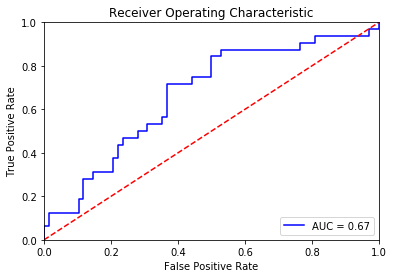

Text(0.5, 0, 'threshold')

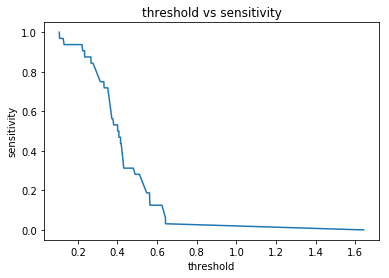

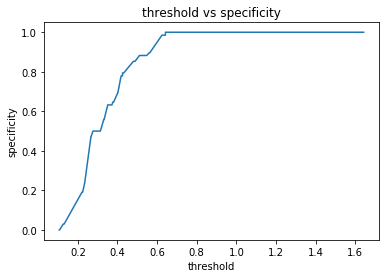

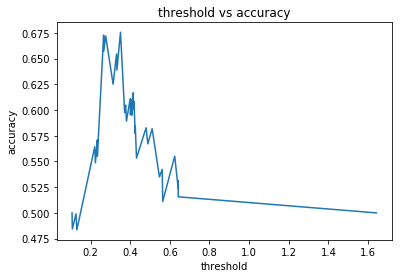

In [212]:
##Create variables
x = adData[['gre','gpa','rank']]
y = adData[['admit']]
xtesting = x[~sample]
ytesting = y[~sample]

phatTesting = fit.predict(xtesting)

fpr, tpr, threshold = skl.metrics.roc_curve(ytesting, phatTesting)
roc_auc = skl.metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.figure()
plt.plot(threshold,tpr)
plt.title('threshold vs sensitivity')
plt.ylabel('sensitivity')
plt.xlabel('threshold')

plt.figure()
plt.plot(threshold,1-fpr)
plt.title('threshold vs specificity')
plt.ylabel('specificity')
plt.xlabel('threshold')

plt.figure()
plt.plot(threshold,((1-fpr+tpr)/2))
plt.title('threshold vs accuracy')
plt.ylabel('accuracy')
plt.xlabel('threshold')

#Question 3

     date         state  n_killed  ...  latitude  longitude  n_guns_involved
0  1/1/13  Pennsylvania         0  ...   40.3467   -79.8559              NaN
1  1/1/13    California         1  ...   33.9090  -118.3330              NaN
2  1/1/13          Ohio         1  ...   41.4455   -82.1377              2.0
3  1/5/13      Colorado         4  ...   39.6518  -104.8020              NaN

[4 rows x 7 columns]


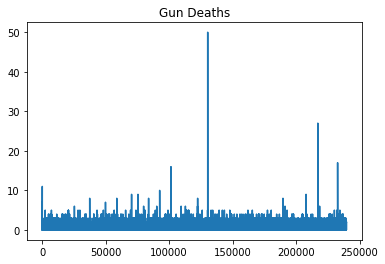

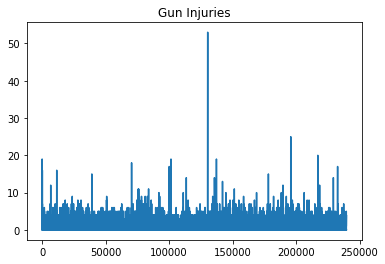

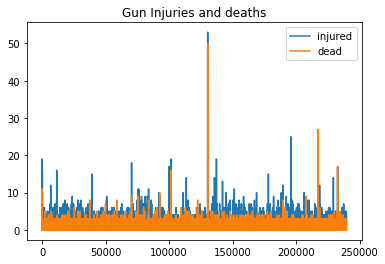

In [213]:
projData= pd.read_csv("https://raw.githubusercontent.com/ozmily/personal/master/gun-violence-data_01-2013_03-2018%202.csv")
print(projData.head(4))

killed=projData['n_killed']
time=projData['date']
injured=projData['n_injured']

plt.title('Gun Deaths')
plt.plot(killed)

plt.figure()
plt.title('Gun Injuries')
plt.plot(injured)
plt.figure()
plt.title('Gun Injuries and deaths')
plt.plot(injured)
plt.plot(killed)
plt.legend(['injured', 'dead'])

From the data you can see that the amount dead nearly always trails behind the injured. What is interesting is that most of the time, the two are nearly equal which is curious. There were also some events where the number of deaths far outweighed the injured. 